In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('/content/drive/MyDrive/IST347/Week_4/titanic_mod.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


EDA

In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

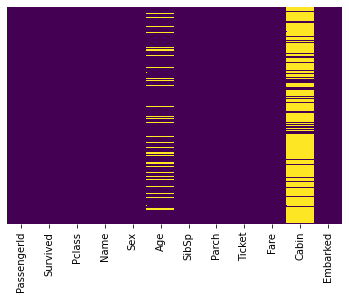

In [4]:
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap = 'viridis')

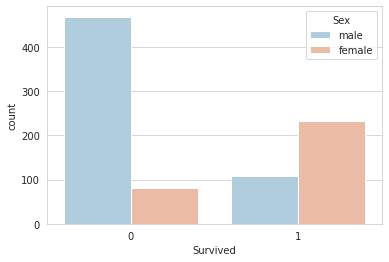

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df, hue = 'Sex', palette='RdBu_r')

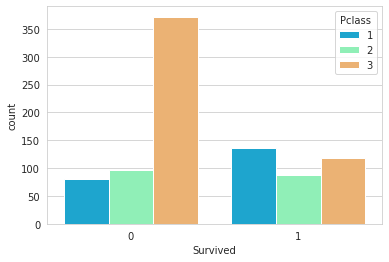

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df, hue = 'Pclass', palette='rainbow')

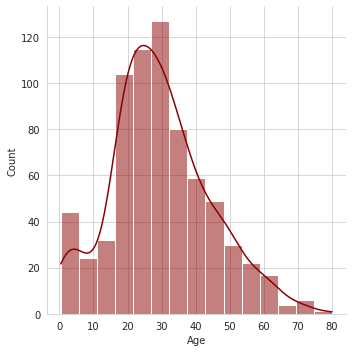

In [7]:
sns.displot(df.Age.dropna(), kde = True, color = 'darkred', bins = 15) #using seaborn

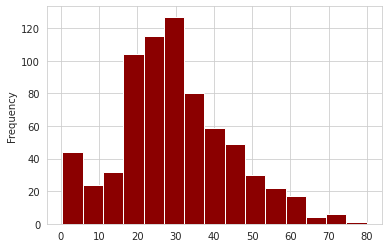

In [8]:
df.Age.plot.hist(bins = 15, color = 'darkred') #using matplotlib 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


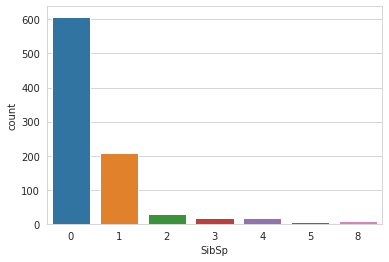

In [10]:
sns.countplot(x='SibSp', data=df)

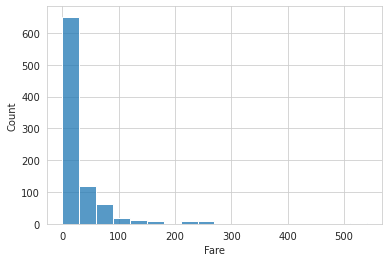

In [11]:
sns.histplot(x='Fare', data=df, bins = 40, binwidth=30)

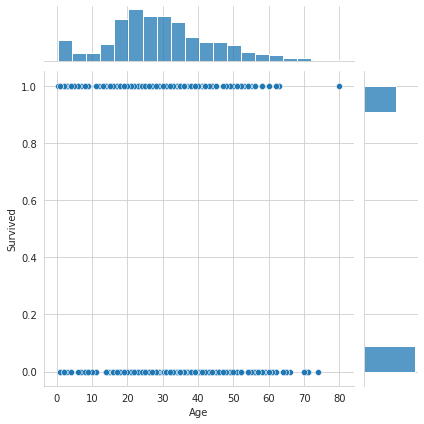

In [12]:
sns.jointplot(x='Age', y='Survived', data=df )

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

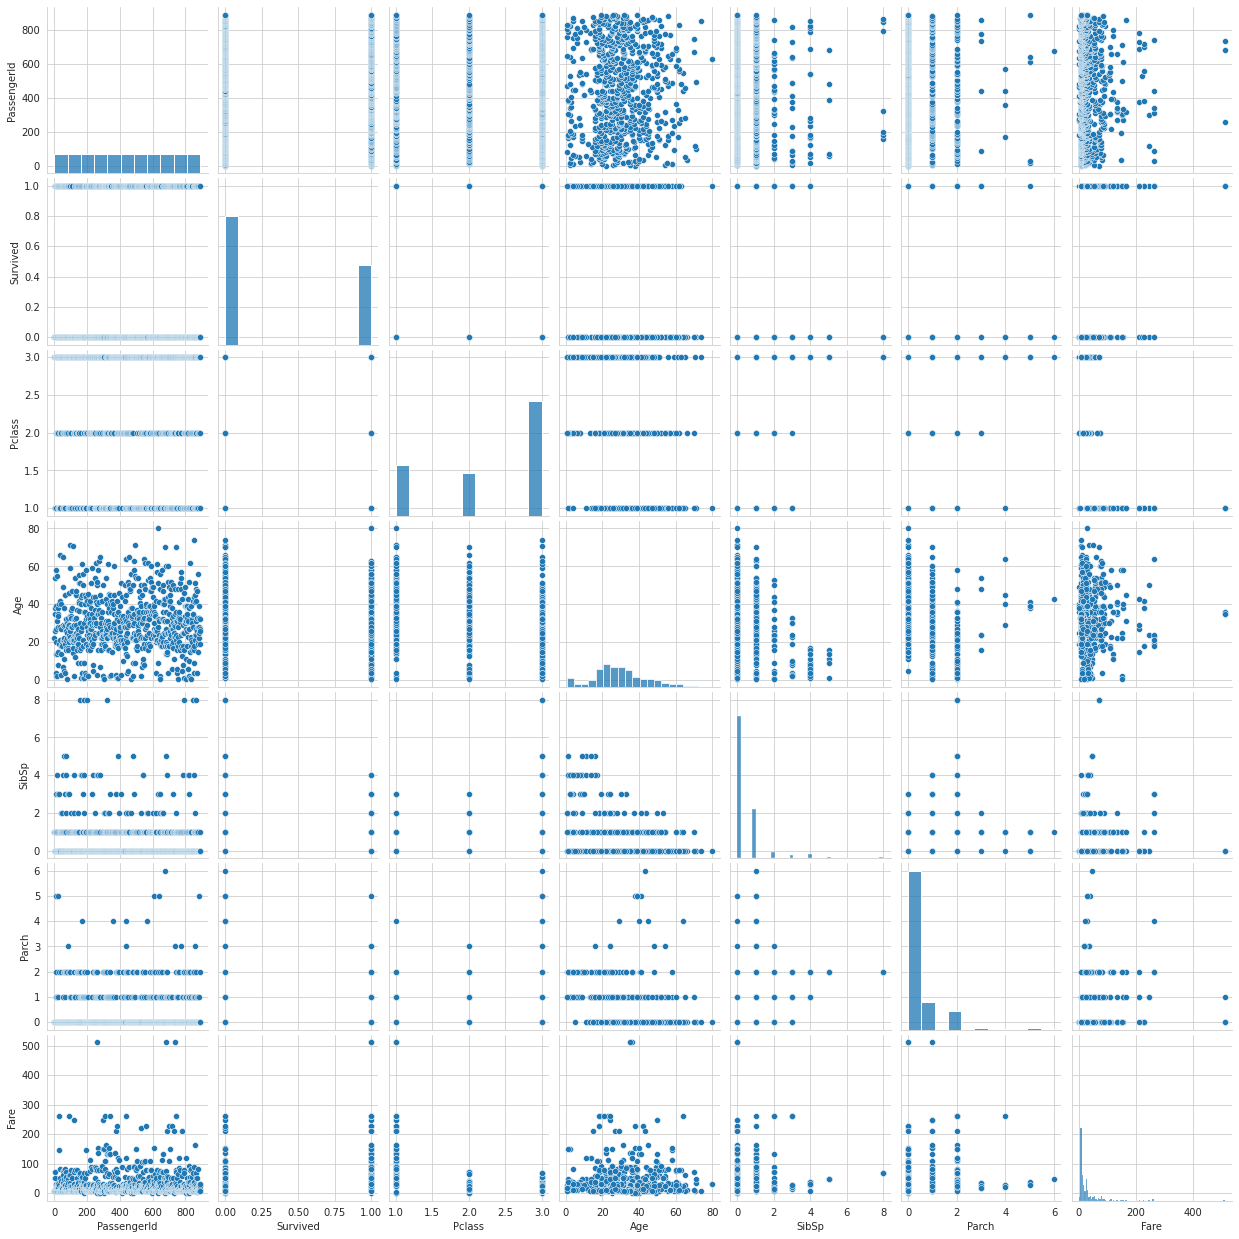

In [14]:
sns.pairplot(data=df)

Data Cleaning

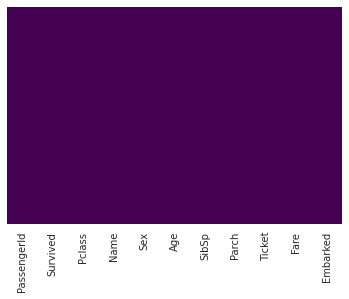

In [15]:
# fill age missing by mean and drop Cabin column
df.Age.fillna(df.Age.mean(), inplace = True)
df.drop('Cabin', axis=1, inplace=True)
sns.heatmap(df.isna(), cbar=False, yticklabels=False, cmap = 'viridis')

In [16]:
df.dropna(inplace=True)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Converting categorical variables to dummy variables

In [17]:
sex = pd.get_dummies(df.Sex, drop_first=True)

In [18]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [19]:
embark = pd.get_dummies(df.Embarked, drop_first=True)

In [20]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [21]:
df.drop(columns = ['Sex', 'Embarked', 'Name', 'Ticket'], inplace = True)

In [22]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [23]:
df = pd.concat([df,sex,embark],axis=1)

In [24]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [25]:
df.drop('PassengerId', axis = 1, inplace=True)

In [26]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q',
       'S'],
      dtype='object')

Build LR 

In [27]:
X = df.iloc[:,:].drop('Survived', axis=1).values
# y = df.loc[:,'Survived'].values
y = df.Survived.values

In [28]:
print(X.shape)
print(y.shape)

(889, 8)
(889,)


In [29]:
#from sklearn.model_selection import train_test_split
# X_train, y_train, X_test, y_test = train_test_split(X,y, test_size = 0.3, random_state = 101)
X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size = 0.30 ,random_state = 101)

In [30]:
#from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='liblinear')

In [31]:
clf = logmodel.fit(X_train, y_train)

In [32]:
predictions = clf.predict(X_test)

In [33]:
prob = clf.predict_proba(X_test) # the actual probabilty for prediction

provide the reports

In [34]:
print('Confusion Matrix')
print(confusion_matrix(y_test, predictions))

Confusion Matrix
[[147  16]
 [ 36  68]]


In [35]:
print('Classification Report')
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       163
           1       0.81      0.65      0.72       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

